In [1]:
import mglearn
import matplotlib.pyplot as plt

X,y = mglearn.datasets.load_extended_boston()

In [2]:
print(X.shape)

(506, 104)


In [3]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [5]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
print(f"Test set predictions: {clf.predict(X_test)}")

Test set predictions: [1 0 1 0 1 0 0]


In [7]:
clf.score(X_test,y_test)

0.8571428571428571

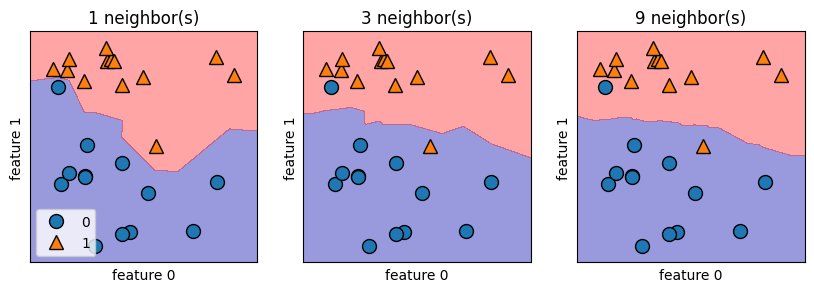

In [8]:
fig, axes = plt.subplots(1,3, figsize=(10,3))
for n_neighbors,ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

# Linear Models
### Linear Models for Regression

w[0]: 0.393906  b: -0.031804


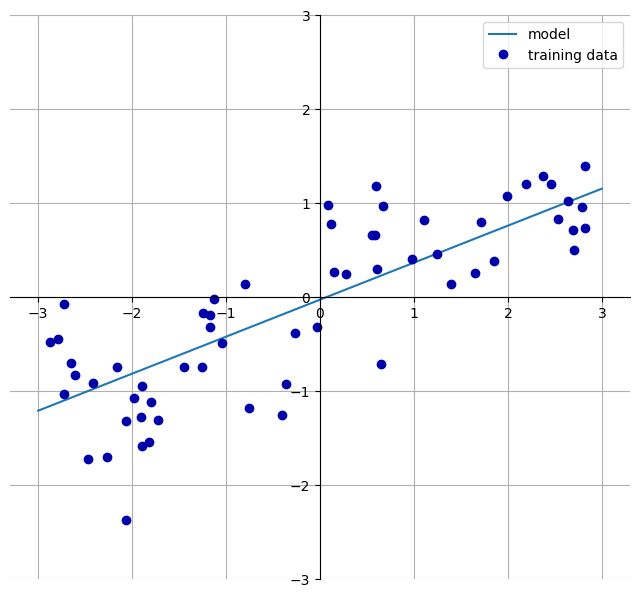

In [9]:
mglearn.plots.plot_linear_regression_wave()

### Linear Regression (Ordinary Least Squares)

In [10]:
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train,y_train)

In [11]:
lr.coef_

array([0.39390555])

In [12]:
lr.intercept_

-0.031804343026759746

In [13]:
print(f"Training set score {lr.score(X_train,y_train)}")
print(f"Test set score {lr.score(X_test,y_test)}")

Training set score 0.6700890315075756
Test set score 0.65933685968637


In [14]:
X,y = mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)

In [15]:
print(f"Training set score {lr.score(X_train,y_train)}")
print(f"Test set score {lr.score(X_test,y_test)}")

Training set score 0.9520519609032728
Test set score 0.6074721959665893


#### From the above scores it can be inferred that the model is most likely overfitting.

### Ridge Regression

In [16]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1).fit(X_train,y_train)
print(f"Training set score {ridge.score(X_train,y_train)}")
print(f"Test set score {ridge.score(X_test,y_test)}")

Training set score 0.8857966585170941
Test set score 0.7527683481744751


In [17]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso(alpha=0.01, max_iter=10000).fit(X_train,y_train)
print(f"Training set score {lasso.score(X_train,y_train)}")
print(f"Test set score {lasso.score(X_test,y_test)}")
print(f"Number of features used: {np.sum(lasso.coef_ !=0)}")

Training set score 0.8962226511086497
Test set score 0.7656571174549982
Number of features used: 33


c:\Users\Administrator\Desktop\Machine-Learning-Practice\machine_learning_practice\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Administrator\Desktop\Machine-Learning-Practice\machine_learning_practice\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


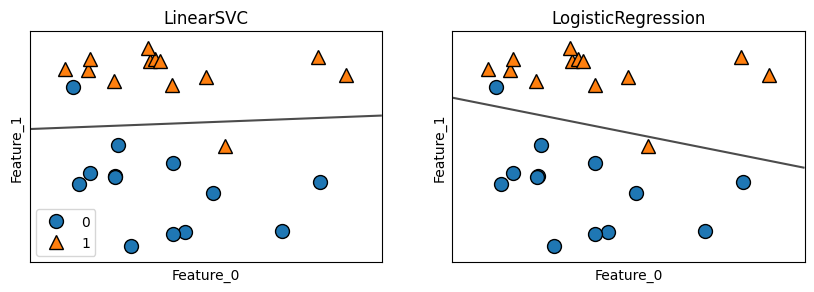

In [18]:
# Linear Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2, figsize=(10,3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, 
                                    ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(f"{clf.__class__.__name__}")
    ax.set_xlabel("Feature_0")
    ax.set_ylabel("Feature_1")
axes[0].legend()

In [19]:
mglearn.plots.plot_animal_tree()

ModuleNotFoundError: No module named 'graphviz'

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print(tree.score(X_train,y_train))
print(tree.score(X_test,y_test))

1.0
0.9370629370629371


In [9]:
import pandas as pd

data = pd.read_csv(r"adult\adult.data", header=None, index_col=False,
                   names=['age','workclass','fnlwgt','education','education-num',
                          'marital-status','occupation','relationship','race',
                          'gender','capital-gain','capital-loss','hours-per-week',
                          'native-country','income'])

In [11]:
data=data[['age','workclass','education','gender','hours-per-week','occupation','income']]

In [13]:
print(data.gender.value_counts())
print(data.workclass.value_counts())

gender
 Male      21790
 Female    10771
Name: count, dtype: int64
workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
